In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [9]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [28]:

lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)

Yhat=lm.predict(X)
score= lm.score(X,Y)
print(f" The model can predict the variance of values of predicted variable Price with {round(score,2)} success score")

 The model can predict the variance of values of predicted variable Price with 0.13 success score


Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

D:\New Folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\New Folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


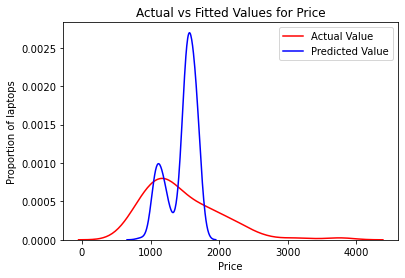

In [29]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model

In [30]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Simple Linear Regression is:', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Simple Linear Regression is: 0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


In [32]:
df1= df[['CPU_frequency','Price']]
df1.corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


In [55]:
lm_slope = lm.coef_
print(lm_slope)
lm_intercept= lm.intercept_
print(lm_intercept)

[1485.19362648]
253.6611706858214


## Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [36]:
lm1 = LinearRegression()

x_mlr= df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
Y = df['Price']

lm1.fit(x_mlr,Y)

Yhat1=lm1.predict(x_mlr)
Yhat1

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022, 1056.42067418, 1252.02084839,  806.98504446,
       1007.51446753, 1449.64309091, 1254.0429167 ,  757.73972448,
        380.80382381, 1345.51622771, 1154.22076129, 1452.55027146,
       1445.33838312, 1254.0429167 , 1345.51622771, 1154.22076129,
       1640.93855733, 1452.55027146, 1543.13847022, 1167.75942573,
       1841.4679804 ,  283.00373671, 1212.25798099, 1552.37242687,
       1939.2680675 , 1376.73250015, 1939.2680675 , 1650.17251398,
       1345.51622771, 1449.64309091, 1154.22076129, 1543.13847022,
       1138.08329264, 1351.8430038 , 1105.31455464, 1056.42067418,
       1543.13847022, 1362.90546776,  882.80281577,  904.78513157,
       1056.42067418, 2093.00082524, 1252.02084839, 1643.84573788,
       1252.02084839, 1345.51622771, 1212.9253343 , 1449.64309091,
       1543.13847022, 1445.33838312, 1449.64309091, 1345.51622771,
        628.97535593, 1775.17253369, 1747.97260108, 1550.35035

In [57]:
lm1_slope = lm1.coef_
print(lm1_slope)
lm1_intercept= lm1.intercept_
print(lm_intercept)

[ 9.61283977e+02  8.68089292e+01  3.94604825e-01  6.56633979e+01
 -4.27445318e+02  9.78000871e+01  1.91295466e+02]
253.6611706858214


Plot the Distribution graph of the predicted values as well as the Actual values


D:\New Folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\New Folder\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Proportion of laptops')

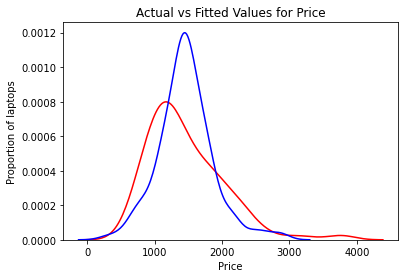

In [42]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?


In [44]:
mse_mlr = mean_squared_error(df['Price'], Yhat1)
r2_score_mlr = lm1.score(x_mlr, Y)
print('The R-square for Simple Linear Regression is:', r2_score_mlr)
print('The mean square error of price and predicted value is: ', mse_mlr)

The R-square for Simple Linear Regression is: 0.5082509055187374
The mean square error of price and predicted value is:  161680.57263893107


The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.